# our object is to calculate the insurance amount

In [210]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


In [211]:
df=pd.read_csv(r'C:\Users\Naveen\Downloads\DS3_C6_S1_Regression_Insurance_Data_Project.csv')
df.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


In [212]:
df.shape

(1338, 8)

In [213]:
df.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [214]:
df['age'].unique()

array([ 19,  18,  28,   0,  32,  31,  46,  37,  60,  25,  62,  23,  56,
        27,  52,  30,  34,  59,  63,  55,  22,  26,  35,  24,  41,  38,
        36,  21,  48,  40,  58,  53,  43,  64,  20,  61,  44,  57,  29,
        45,  54, -58,  49,  47,  51,  42,  50,  39,  33, 190,  -1],
      dtype=int64)

In [215]:
df['age'].mode()[0]

18

In [216]:
df['age'].replace(to_replace=[0,-58,-1],value=18,inplace=True)

In [217]:
df['age'].unique()

array([ 19,  18,  28,  32,  31,  46,  37,  60,  25,  62,  23,  56,  27,
        52,  30,  34,  59,  63,  55,  22,  26,  35,  24,  41,  38,  36,
        21,  48,  40,  58,  53,  43,  64,  20,  61,  44,  57,  29,  45,
        54,  49,  47,  51,  42,  50,  39,  33, 190], dtype=int64)

In [218]:
df['age'].replace(to_replace=190,value=18,inplace=True)

In [219]:
df['age'].unique()

array([19, 18, 28, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34, 59,
       63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64, 20,
       61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39, 33], dtype=int64)

In [220]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [221]:
df['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [222]:
df['classif'].unique()

array(['PREO', 'OB1', 'N', 'OB2', 'OB3', nan, 'UW'], dtype=object)

In [223]:
cls=df['classif'].mode()[0]

In [224]:
df['classif'].fillna(value=cls,inplace=True)

In [225]:
df['classif'].unique()

array(['PREO', 'OB1', 'N', 'OB2', 'OB3', 'UW'], dtype=object)

In [226]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [227]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [228]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [229]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [230]:
df.isnull().sum()

age         0
sex         0
bmi         0
classif     0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [231]:
df1=df.copy()

# checking information with groupby

In [232]:
d = df1.groupby(by=['smoker'])['charges'].mean().sort_values()     #no. of smoker is more than non smoker
d

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [233]:
d1=df1.groupby(by=['age'])['charges'].mean().sort_values()
d1

age
21     4730.464330
26     6133.825309
18     7642.104378
38     8102.733674
28     9069.187564
32     9220.300291
41     9653.745650
25     9838.365311
19     9861.632891
22    10012.932802
20    10159.697736
31    10196.980573
29    10430.158727
24    10648.015962
35    11307.182031
34    11613.528121
40    11772.251310
39    11778.242945
33    11966.215482
27    12184.701721
36    12204.476138
23    12419.820040
49    12696.006264
30    12719.110358
42    13061.038669
58    14072.206615
46    14342.590639
48    14632.500445
45    14830.199856
56    15025.515837
50    15663.003301
51    15682.255867
44    15859.396587
53    16020.930755
55    16164.545488
57    16447.185250
47    17653.999593
37    18019.911877
52    18256.269719
54    18758.546475
59    18895.869532
62    19163.856573
43    19267.278653
63    19884.998461
61    21700.962032
60    21979.418507
64    23275.530837
Name: charges, dtype: float64

## here we can see as the age is increasing mostly the charges also increasing

In [234]:
d3=df1.groupby(by=['children'])['charges'].mean().sort_values()      # we cannot conclude
d3

children
5     8786.035247
0    12365.975602
1    12731.171832
4    13850.656311
2    15073.563734
3    15355.318367
Name: charges, dtype: float64

In [235]:
d4=df1.groupby(by=['sex'])['charges'].mean().sort_values()       # male are greater than the female who having higher charges
d4                                                               # but not much 

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [236]:
d5=df1.groupby(by=['region'])['charges'].mean().sort_values()
d5

region
southwest    12346.937377
northwest    12417.575374
northeast    13406.384516
southeast    14735.411438
Name: charges, dtype: float64

In [237]:
d6=df1.groupby(by=['classif'])['charges'].mean().sort_values()
d6

classif
UW       7595.253968
N       10448.399945
PREO    10998.374214
OB1     14384.905367
OB3     16784.615546
OB2     17090.900977
Name: charges, dtype: float64

## OB2 classif has consumed high charges rather than other health classification

In [238]:
df1

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,18,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830
1334,18,female,31.920,OB1,0,no,northeast,2205.98080
1335,18,female,36.850,OB2,0,no,southeast,1629.83350
1336,21,female,25.800,PREO,0,no,southwest,2007.94500


# bivariate analysis with visualization

<AxesSubplot:xlabel='age', ylabel='charges'>

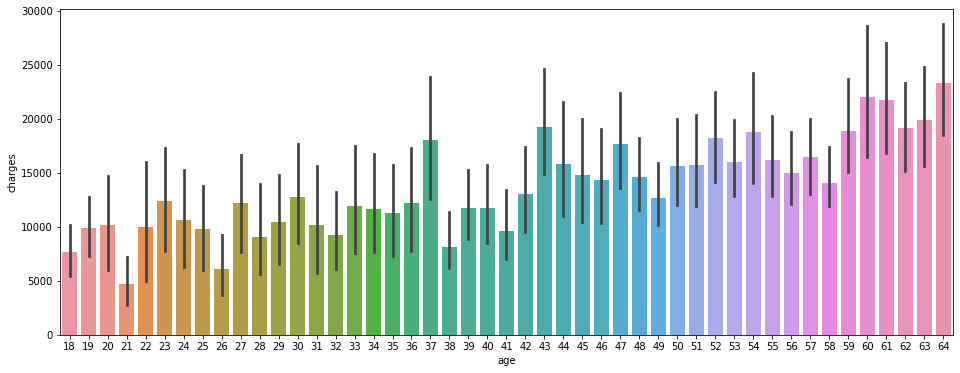

In [239]:
pt.figure(figsize=(16,6))
sb.barplot(data=df1,x='age',y='charges')

## here we can see when age is increasing the charges is also increasing

<AxesSubplot:xlabel='sex', ylabel='charges'>

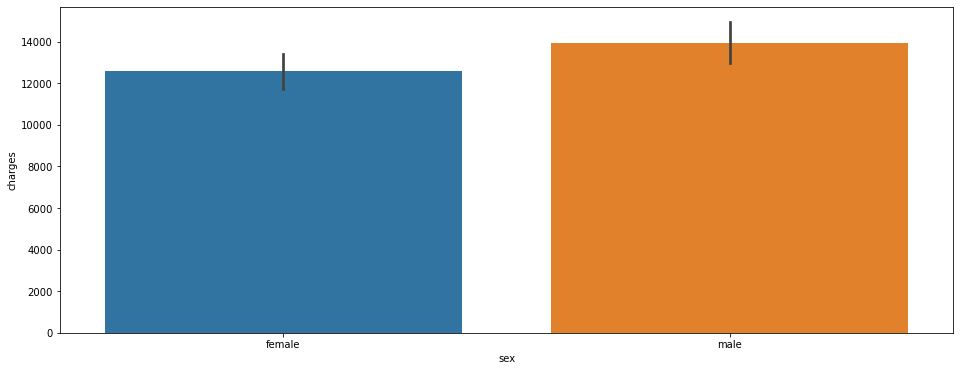

In [240]:
pt.figure(figsize=(16,6))
sb.barplot(data=df1,x='sex',y='charges')

## according to gender male has higher charge than the female

<AxesSubplot:xlabel='classif', ylabel='charges'>

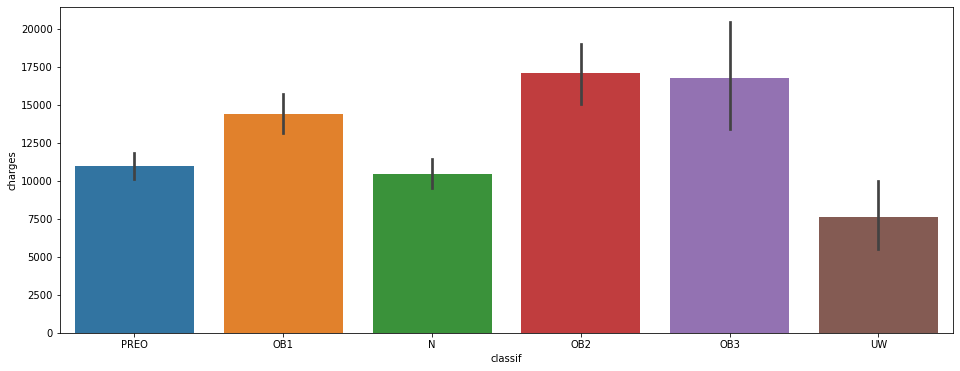

In [242]:
pt.figure(figsize=(16,6))
sb.barplot(data=df1,x='classif',y='charges')

## QB2 health classification is the highest and the second highest is QB3

<AxesSubplot:xlabel='smoker', ylabel='charges'>

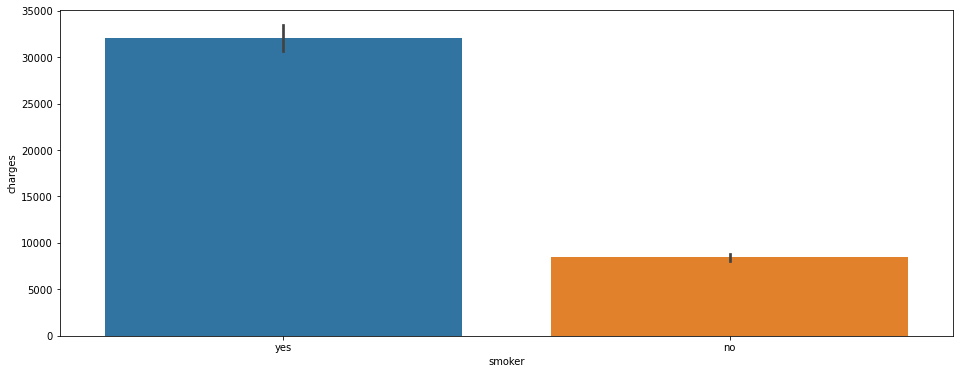

In [243]:

pt.figure(figsize=(16,6))
sb.barplot(data=df1,x='smoker',y='charges')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


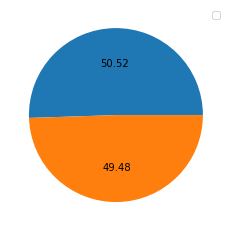

In [376]:
a=df1['sex'].value_counts()
pt.pie(x=a,autopct='%.2f')
pt.legend()
pt.show()

## smoker has higher charges then the non smoker

<AxesSubplot:xlabel='region', ylabel='charges'>

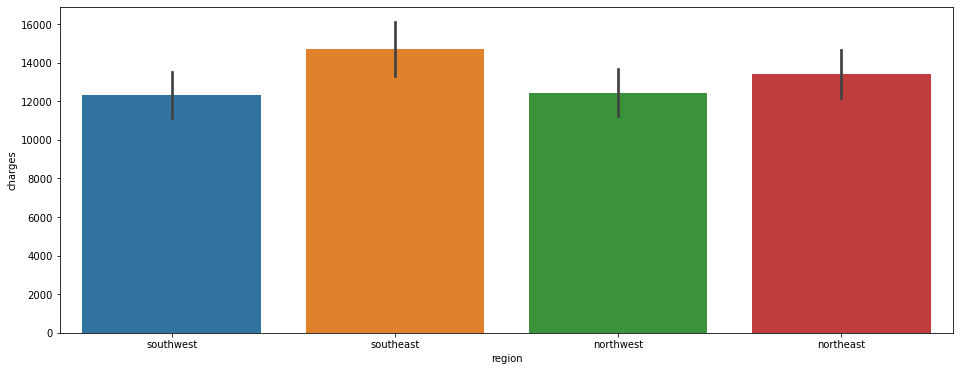

In [245]:
pt.figure(figsize=(16,6))
sb.barplot(data=df1,x='region',y='charges')

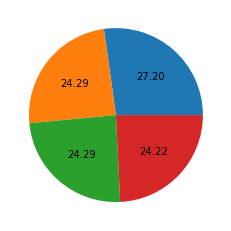

In [246]:
b=df1['region'].value_counts()
pt.pie(x=b,autopct='%.2f')
pt.show()

 ## we cant conclude clearly to see that but southeast region  has the higher charges

In [247]:
corr1=df1.corr()

<AxesSubplot:>

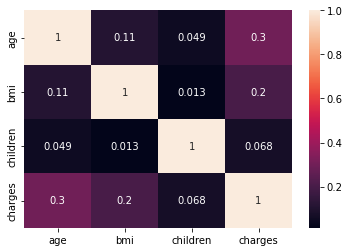

In [248]:
sb.heatmap(corr1,annot=True)

## this is without scaling only for numerical columns here age correaltion is higher than the others

In [249]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1338 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


# change datatype of object column in to category

In [250]:
df['sex']=df['sex'].astype('category')
df['classif']=df['classif'].astype('category')
df['smoker']=df['smoker'].astype('category')
df['region']=df['region'].astype('category')

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   classif   1338 non-null   category
 4   children  1338 non-null   int64   
 5   smoker    1338 non-null   category
 6   region    1338 non-null   category
 7   charges   1338 non-null   float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 47.8 KB


In [252]:
from sklearn.preprocessing import LabelEncoder

In [253]:
le=LabelEncoder()

In [254]:
df['sex']=le.fit_transform(df['sex'])
df['classif']=le.fit_transform(df['classif'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

In [255]:
df.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,0,27.900,4,0,1,3,16884.92400
1,18,1,33.770,1,1,0,2,1725.55230
2,28,1,33.000,1,3,0,2,4449.46200
3,18,1,22.705,0,0,0,1,21984.47061
4,32,1,28.880,4,0,0,1,3866.85520


# feature scaling

In [256]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [257]:
scaler=MinMaxScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(df.to_numpy()),columns=df.columns)

In [258]:
scaled_df

,age,sex,bmi,classif,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.8,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.2,0.6,0.0,0.666667,0.053115
3,0.000000,1.0,0.181464,0.0,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.8,0.0,0.0,0.333333,0.043816
...,...,...,...,...,...,...,...,...
1333,0.695652,1.0,0.403820,0.2,0.6,0.0,0.333333,0.151299
1334,0.000000,0.0,0.429379,0.2,0.0,0.0,0.000000,0.017305
1335,0.000000,0.0,0.562012,0.4,0.0,0.0,0.666667,0.008108
1336,0.065217,0.0,0.264730,0.8,0.0,0.0,1.000000,0.014144


In [259]:
df1.head()         # fresh dataframe without any labelencoder

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,18,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


In [260]:
corr2=scaled_df.corr()

<AxesSubplot:>

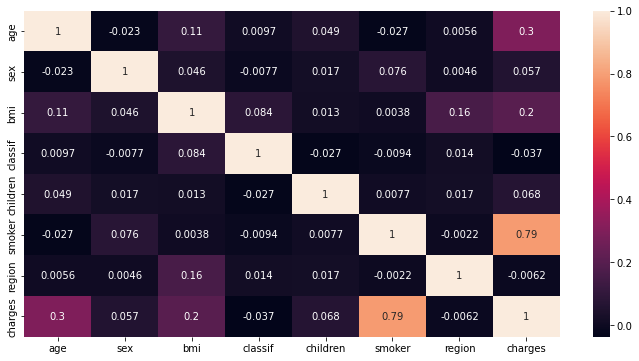

In [261]:
pt.figure(figsize=(12,6))
sb.heatmap(corr2,annot=True)

# smoker is highly correlated with charges 79%

# spliting the data or seperate the independent and dependent column

In [262]:
x=scaled_df.iloc[:,:7]
x.head()

,age,sex,bmi,classif,children,smoker,region
0,0.021739,0.0,0.321227,0.8,0.0,1.0,1.000000
1,0.000000,1.0,0.479150,0.2,0.2,0.0,0.666667
2,0.217391,1.0,0.458434,0.2,0.6,0.0,0.666667
3,0.000000,1.0,0.181464,0.0,0.0,0.0,0.333333
4,0.304348,1.0,0.347592,0.8,0.0,0.0,0.333333


In [263]:
y=scaled_df.iloc[:,7:8]
y.head()

,charges
0,0.251611
1,0.009636
2,0.053115
3,0.333010
4,0.043816


# train test split

# for all columns

In [264]:
from sklearn.model_selection import train_test_split

In [265]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [266]:
x_train.shape

(936, 7)

In [267]:
x_test.shape

(402, 7)

# linear regression

In [268]:
lr=LinearRegression()

In [269]:
model1=lr.fit(x_train,y_train)

In [270]:
model1

LinearRegression()

In [271]:
coefficient_Determination =model1.score(x_train,y_train)
coefficient_Determination

0.7626093229729252

In [272]:
model1.intercept_

array([-0.04373446])

In [273]:
model1.coef_

array([[ 0.19493749, -0.00436207,  0.20518108, -0.02969478,  0.04808777,
         0.38628179, -0.01345445]])

In [274]:
y_pred1 = model1.predict(x_test)

In [275]:
y_pred1

array([[ 0.10242167],
       [ 0.06461158],
       [ 0.22663162],
       [ 0.15610732],
       [ 0.03022751],
       [ 0.14394001],
       [ 0.15153404],
       [ 0.38797336],
       [ 0.12098405],
       [ 0.49027622],
       [ 0.02236843],
       [ 0.03720681],
       [ 0.08967906],
       [ 0.17156563],
       [ 0.19126377],
       [ 0.17434171],
       [ 0.0801658 ],
       [ 0.27772201],
       [ 0.1421362 ],
       [ 0.46692655],
       [ 0.53699983],
       [ 0.05007076],
       [-0.01032994],
       [ 0.08928712],
       [ 0.04338967],
       [ 0.20454431],
       [ 0.1726826 ],
       [ 0.16360876],
       [ 0.09069553],
       [ 0.46770343],
       [-0.03611614],
       [ 0.5278394 ],
       [ 0.14315952],
       [ 0.11540708],
       [ 0.11414022],
       [ 0.17189584],
       [ 0.20555386],
       [ 0.18514163],
       [ 0.13104723],
       [ 0.12507686],
       [ 0.24143202],
       [ 0.13042291],
       [ 0.0588431 ],
       [ 0.16784157],
       [ 0.06411238],
       [ 0

In [276]:
data2 = pd.DataFrame()
data2['actual_y'] = y_test
data2['predict'] = y_pred1


In [277]:
data2

,actual_y,predict
7,0.098320,0.102422
999,0.066178,0.064612
1209,0.179179,0.226632
491,0.373372,0.156107
625,0.041734,0.030228
...,...,...
854,0.366889,0.546297
554,0.267477,0.108130
1278,0.340633,0.490128
374,0.004304,0.041354


# error 

In [278]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [279]:
MSE=mean_squared_error(y_test,y_pred1)
MAE=mean_absolute_error(y_test,y_pred1)
RMSE=mean_squared_error(y_test,y_pred1,squared=False)
print(MSE,MAE,RMSE)

0.009290350481213351 0.06660132202922234 0.09638646420122149


In [280]:
r2_score=model1.score(x_test,y_test)

In [281]:
score1=round(r2_score,2)
score1

0.72

# the r score of our model is 72 %

# for 1 columns

In [282]:
x1=df.iloc[:,5:6]
x1

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [283]:
y1=df.iloc[:,7:8]
y1

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [284]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=10)

In [285]:
x1_train.shape

(936, 1)

In [286]:
x1_test.shape

(402, 1)

In [287]:
lr=LinearRegression()

In [288]:
model2=lr.fit(x1_train,y1_train)

In [289]:
model2

LinearRegression()

In [290]:
coefficient_Determination =model2.score(x1_train,y1_train)
coefficient_Determination

0.6189465597859611

In [291]:
model2.intercept_

array([8478.76887371])

In [292]:
model2.coef_

array([[24100.71108188]])

In [293]:
y_pred2 = model2.predict(x1_test)

In [294]:
y_pred2

array([[ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [32579.4799556 ],
       [ 8478.76887371],
       [32579.4799556 ],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [32579.4799556 ],
       [32579.4799556 ],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [32579.4799556 ],
       [ 8478.76887371],
       [32579.4799556 ],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],
       [ 8478.76887371],


In [295]:
data3 = pd.DataFrame()
data3['actual_y'] = y1_test
data3['predict'] = y_pred2


In [296]:
data3

,actual_y,predict
7,7281.50560,8478.768874
999,5267.81815,8478.768874
1209,12347.17200,8478.768874
491,24513.09126,8478.768874
625,3736.46470,8478.768874
...,...,...
854,24106.91255,32579.479956
554,17878.90068,8478.768874
1278,22462.04375,32579.479956
374,1391.52870,8478.768874


In [297]:
r3_score=model2.score(x1_test,y1_test)

In [298]:
score2=round(r3_score,2)
score2

0.62

# r_score of 1 column is 62%

# 2. Linear regression of age vs charge columns

In [299]:
df.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,0,27.900,4,0,1,3,16884.92400
1,18,1,33.770,1,1,0,2,1725.55230
2,28,1,33.000,1,3,0,2,4449.46200
3,18,1,22.705,0,0,0,1,21984.47061
4,32,1,28.880,4,0,0,1,3866.85520


In [300]:
x2=df[['age','smoker']]
x2

,age,smoker
0,19,1
1,18,0
2,28,0
3,18,0
4,32,0
...,...,...
1333,50,0
1334,18,0
1335,18,0
1336,21,0


In [301]:
y2=df.iloc[:,7:8]
y2

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [302]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3,random_state=10)

In [303]:
x2_train.shape

(936, 2)

In [304]:
x2_test.shape

(402, 2)

In [305]:
lr2=LinearRegression()

In [306]:
model5=lr2.fit(x2_train,y2_train)

In [307]:
model5

LinearRegression()

In [308]:
coefficient_Determination2 =model5.score(x2_train,y2_train)
coefficient_Determination2

0.7296326931339182

In [309]:
model5.coef_

array([[  289.70054365, 24243.84111847]])

In [310]:
model5.intercept_

array([-2893.63456736])

In [311]:
y_pred4=model5.predict(x2_test)
y_pred4

array([[ 7825.28554779],
       [ 7535.58500414],
       [14198.69750815],
       [14778.09859545],
       [ 5507.68119857],
       [ 8984.0877224 ],
       [10142.88989701],
       [27144.21742417],
       [ 9853.18935336],
       [33807.32992818],
       [ 3190.07684935],
       [ 4638.57956761],
       [ 9563.48880971],
       [ 8984.0877224 ],
       [11011.99152797],
       [14488.3980518 ],
       [ 4348.87902396],
       [15357.49968276],
       [13329.59587719],
       [31779.42612261],
       [34097.03047183],
       [ 2610.67576204],
       [ 2320.97521839],
       [ 8114.98609144],
       [ 5217.98065492],
       [14198.69750815],
       [ 9853.18935336],
       [12750.19478988],
       [ 4638.57956761],
       [32648.52775356],
       [ 2610.67576204],
       [32648.52775356],
       [10142.88989701],
       [ 9853.18935336],
       [ 5507.68119857],
       [ 7245.88446049],
       [15067.79913911],
       [12170.79370258],
       [11591.39261527],
       [ 9853.18935336],


In [312]:
data6 = pd.DataFrame()
data6['actual_y'] = y2_test
data6['predict'] = y_pred4


In [313]:
data6

,actual_y,predict
7,7281.50560,7825.285548
999,5267.81815,7535.585004
1209,12347.17200,14198.697508
491,24513.09126,14778.098595
625,3736.46470,5507.681199
...,...,...
854,24106.91255,35545.533190
554,17878.90068,4348.879024
1278,22462.04375,32648.527754
374,1391.52870,2900.376306


In [314]:
r4_score=model5.score(x2_test,y2_test)

In [315]:
score3=round(r4_score,2)
score3

0.69

## r_score of two correlated features is 69%

# Logistic regression:-

In [316]:
x_train.shape

(936, 7)

In [317]:
y_train.shape

(936, 1)

In [318]:
lg=LogisticRegression()

In [319]:
# model3=lg.fit(x_train,y_train)

# this model is not used for continoues column

# DECISION TREE REGRESSOR

In [320]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [321]:
dt=DecisionTreeRegressor(max_depth=3,random_state=10)

In [322]:
model4=dt.fit(x_train,y_train)

In [323]:
model4

DecisionTreeRegressor(max_depth=3, random_state=10)

In [324]:
y_pred3=dt.predict(x_test)

In [325]:
y_pred3

array([0.0998815 , 0.0998815 , 0.2092983 , 0.2092983 , 0.05226734,
       0.0998815 , 0.14137364, 0.27755837, 0.14137364, 0.37843843,
       0.05226734, 0.05226734, 0.14137364, 0.0998815 , 0.14137364,
       0.2092983 , 0.05226734, 0.2092983 , 0.2092983 , 0.27755837,
       0.71154577, 0.05226734, 0.05226734, 0.0998815 , 0.05226734,
       0.2092983 , 0.14137364, 0.2092983 , 0.05226734, 0.27755837,
       0.05226734, 0.58511547, 0.14137364, 0.14137364, 0.05226734,
       0.0998815 , 0.2092983 , 0.2092983 , 0.14137364, 0.14137364,
       0.2092983 , 0.14137364, 0.0998815 , 0.14137364, 0.05226734,
       0.0998815 , 0.14137364, 0.58511547, 0.2092983 , 0.2092983 ,
       0.58511547, 0.05226734, 0.14137364, 0.2092983 , 0.2092983 ,
       0.2092983 , 0.2092983 , 0.0998815 , 0.0998815 , 0.71154577,
       0.05226734, 0.37843843, 0.37843843, 0.05226734, 0.27755837,
       0.14137364, 0.05226734, 0.0998815 , 0.14137364, 0.14137364,
       0.14137364, 0.05226734, 0.0998815 , 0.0998815 , 0.14137

In [326]:
from sklearn.metrics import r2_score

In [327]:
score4=round(r2_score(y_test,y_pred3),2)

In [328]:
score4

0.84

# score of decision tree regressor is 84 %

In [329]:
data5=pd.DataFrame()

In [330]:
data5['actual_y']=y_test
data5['Predicted']=y_pred3

In [331]:
data5

,actual_y,Predicted
7,0.098320,0.099882
999,0.066178,0.099882
1209,0.179179,0.209298
491,0.373372,0.209298
625,0.041734,0.052267
...,...,...
854,0.366889,0.378438
554,0.267477,0.052267
1278,0.340633,0.277558
374,0.004304,0.052267


In [332]:
df1.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,18,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


# conclusion:-

## ** Decision tree regressor is the best model......to our data and the accuracy of this model is high rather than other model..

## Decision_regressor= 84%
## linear_regression for multiple=71%
## linear_regression for one column smoker=61%
## linear_regression for one column ages=3%



## ** smoker or non smoker is giving effect for the insurance policy amount

In [333]:
data5

,actual_y,Predicted
7,0.098320,0.099882
999,0.066178,0.099882
1209,0.179179,0.209298
491,0.373372,0.209298
625,0.041734,0.052267
...,...,...
854,0.366889,0.378438
554,0.267477,0.052267
1278,0.340633,0.277558
374,0.004304,0.052267


In [334]:
data6

,actual_y,predict
7,7281.50560,7825.285548
999,5267.81815,7535.585004
1209,12347.17200,14198.697508
491,24513.09126,14778.098595
625,3736.46470,5507.681199
...,...,...
854,24106.91255,35545.533190
554,17878.90068,4348.879024
1278,22462.04375,32648.527754
374,1391.52870,2900.376306


In [335]:
data3

,actual_y,predict
7,7281.50560,8478.768874
999,5267.81815,8478.768874
1209,12347.17200,8478.768874
491,24513.09126,8478.768874
625,3736.46470,8478.768874
...,...,...
854,24106.91255,32579.479956
554,17878.90068,8478.768874
1278,22462.04375,32579.479956
374,1391.52870,8478.768874


In [336]:
data2

,actual_y,predict
7,0.098320,0.102422
999,0.066178,0.064612
1209,0.179179,0.226632
491,0.373372,0.156107
625,0.041734,0.030228
...,...,...
854,0.366889,0.546297
554,0.267477,0.108130
1278,0.340633,0.490128
374,0.004304,0.041354


In [337]:
na=pd.DataFrame()

In [338]:
na['actual']=data2['actual_y']

In [339]:
na

,actual
7,0.098320
999,0.066178
1209,0.179179
491,0.373372
625,0.041734
...,...
854,0.366889
554,0.267477
1278,0.340633
374,0.004304


In [340]:
na['predicted_LR']=data2['predict']

In [341]:
na

,actual,predicted_LR
7,0.098320,0.102422
999,0.066178,0.064612
1209,0.179179,0.226632
491,0.373372,0.156107
625,0.041734,0.030228
...,...,...
854,0.366889,0.546297
554,0.267477,0.108130
1278,0.340633,0.490128
374,0.004304,0.041354


In [342]:
na['actual_y']=data3['actual_y']

In [343]:
na['predicted_smoker_LR']=data3['predict']

In [344]:
na

,actual,predicted_LR,actual_y,predicted_smoker_LR
7,0.098320,0.102422,7281.50560,8478.768874
999,0.066178,0.064612,5267.81815,8478.768874
1209,0.179179,0.226632,12347.17200,8478.768874
491,0.373372,0.156107,24513.09126,8478.768874
625,0.041734,0.030228,3736.46470,8478.768874
...,...,...,...,...
854,0.366889,0.546297,24106.91255,32579.479956
554,0.267477,0.108130,17878.90068,8478.768874
1278,0.340633,0.490128,22462.04375,32579.479956
374,0.004304,0.041354,1391.52870,8478.768874


In [345]:
na['predicted_DR']=data5['Predicted']

In [346]:
na

,actual,predicted_LR,actual_y,predicted_smoker_LR,predicted_DR
7,0.098320,0.102422,7281.50560,8478.768874,0.099882
999,0.066178,0.064612,5267.81815,8478.768874,0.099882
1209,0.179179,0.226632,12347.17200,8478.768874,0.209298
491,0.373372,0.156107,24513.09126,8478.768874,0.209298
625,0.041734,0.030228,3736.46470,8478.768874,0.052267
...,...,...,...,...,...
854,0.366889,0.546297,24106.91255,32579.479956,0.378438
554,0.267477,0.108130,17878.90068,8478.768874,0.052267
1278,0.340633,0.490128,22462.04375,32579.479956,0.277558
374,0.004304,0.041354,1391.52870,8478.768874,0.052267


In [347]:
na

,actual,predicted_LR,actual_y,predicted_smoker_LR,predicted_DR
7,0.098320,0.102422,7281.50560,8478.768874,0.099882
999,0.066178,0.064612,5267.81815,8478.768874,0.099882
1209,0.179179,0.226632,12347.17200,8478.768874,0.209298
491,0.373372,0.156107,24513.09126,8478.768874,0.209298
625,0.041734,0.030228,3736.46470,8478.768874,0.052267
...,...,...,...,...,...
854,0.366889,0.546297,24106.91255,32579.479956,0.378438
554,0.267477,0.108130,17878.90068,8478.768874,0.052267
1278,0.340633,0.490128,22462.04375,32579.479956,0.277558
374,0.004304,0.041354,1391.52870,8478.768874,0.052267


In [348]:
na['actual_y']=data5['Predicted']

In [349]:
na

,actual,predicted_LR,actual_y,predicted_smoker_LR,predicted_DR
7,0.098320,0.102422,0.099882,8478.768874,0.099882
999,0.066178,0.064612,0.099882,8478.768874,0.099882
1209,0.179179,0.226632,0.209298,8478.768874,0.209298
491,0.373372,0.156107,0.209298,8478.768874,0.209298
625,0.041734,0.030228,0.052267,8478.768874,0.052267
...,...,...,...,...,...
854,0.366889,0.546297,0.378438,32579.479956,0.378438
554,0.267477,0.108130,0.052267,8478.768874,0.052267
1278,0.340633,0.490128,0.277558,32579.479956,0.277558
374,0.004304,0.041354,0.052267,8478.768874,0.052267


In [350]:
z=round(data5['actual_y'],2)

In [351]:
z

7       0.10
999     0.07
1209    0.18
491     0.37
625     0.04
        ... 
854     0.37
554     0.27
1278    0.34
374     0.00
6       0.11
Name: actual_y, Length: 402, dtype: float64

In [352]:
from sklearn.model_selection import KFold,cross_val_score

In [353]:
x.head()

,age,sex,bmi,classif,children,smoker,region
0,0.021739,0.0,0.321227,0.8,0.0,1.0,1.000000
1,0.000000,1.0,0.479150,0.2,0.2,0.0,0.666667
2,0.217391,1.0,0.458434,0.2,0.6,0.0,0.666667
3,0.000000,1.0,0.181464,0.0,0.0,0.0,0.333333
4,0.304348,1.0,0.347592,0.8,0.0,0.0,0.333333


In [354]:
y.head()

,charges
0,0.251611
1,0.009636
2,0.053115
3,0.333010
4,0.043816


# adaboost regressor

In [355]:
from sklearn.ensemble import AdaBoostRegressor
# Defining model
model3 = AdaBoostRegressor()

#Evaluate the model
cv1 = KFold(n_splits=10,random_state=None,shuffle=False)
RF_score = cross_val_score(model3,x,y,scoring='r2',cv=cv1,n_jobs=-1,error_score='raise')

print(RF_score)
print('\n')


print("r2 value of adaboost:",RF_score.mean())

[0.83325809 0.83093441 0.81805875 0.72535965 0.82245178 0.83451685
 0.81793898 0.77627233 0.84826319 0.83547051]


r2 value of adaboost: 0.8142524533222797


In [356]:
score5=round(RF_score.mean(),2)
score5

0.81

# random forest

In [357]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

# Defining model
model2 = RandomForestRegressor()

#Evaluate the model
cv1 = KFold(n_splits=10,random_state=None,shuffle=False)
RF_score1 = cross_val_score(model2,x,y,scoring='r2',cv=cv1,n_jobs=-1,error_score='raise')
# results.append(RF_score1)
# names.append('Random forest')
print(RF_score1)
print('\n')


print("r2 value :",RF_score1.mean())

[0.8593663  0.83176663 0.80696059 0.71020398 0.85786386 0.88573492
 0.85466865 0.79700687 0.84243315 0.85129804]


r2 value : 0.829730298733063


In [358]:
score6=round(RF_score1.mean(),2)
score6

0.83

# 83 % for random forest

# grid search cv

In [359]:
from sklearn.model_selection import GridSearchCV

In [360]:
paramaters=[{'max_depth':[3,4,5,6,7,8,9],'max_features':['auto']},
            {'max_depth':[3,4,5,6,7,8,9],'max_features' :["sqrt" ]},
           {'max_depth':[3,4,5,6,7,8,9],'max_features' :["log2" ]}]

In [361]:
grid=GridSearchCV(estimator=model2,param_grid=paramaters,scoring='r2')

In [362]:
grid

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [3, 4, 5, 6, 7, 8, 9],
                          'max_features': ['auto']},
                         {'max_depth': [3, 4, 5, 6, 7, 8, 9],
                          'max_features': ['sqrt']},
                         {'max_depth': [3, 4, 5, 6, 7, 8, 9],
                          'max_features': ['log2']}],
             scoring='r2')

In [363]:
grid=grid.fit(x_train,y_train)

In [364]:
accuracy=grid.best_score_

In [365]:
score7=round(accuracy,2)
score7

0.86

In [366]:
params=grid.best_params_

In [367]:
params

{'max_depth': 4, 'max_features': 'auto'}

# CONCLUSION:- HERE i used grid search cv on random forest so we can see features of random forest is performed well in these parameters

overall we can say the best model is random forest with max depth 5 and max feature auto it is g

In [368]:
ax=pd.DataFrame()

In [369]:
ax['Model']=['Linear_regression','Linear_regression_smoker','Linear_regression_corr','Decision_tree_regressor','Adaboost_regressor','Random_forest_regressor','Grid_Search_random_forest']

In [370]:
ax

,Model
0,Linear_regression
1,Linear_regression_smoker
2,Linear_regression_corr
3,Decision_tree_regressor
4,Adaboost_regressor
5,Random_forest_regressor
6,Grid_Search_random_forest


In [371]:
ax['SCore']=[score1,score2,score3,score4,score5,score6,score7]

# ****************SCore of all the models****************

In [372]:
ax

,Model,SCore
0,Linear_regression,0.72
1,Linear_regression_smoker,0.62
2,Linear_regression_corr,0.69
3,Decision_tree_regressor,0.84
4,Adaboost_regressor,0.81
5,Random_forest_regressor,0.83
6,Grid_Search_random_forest,0.86
